In [1]:
import numpy as np
import gym
import or_gym
import matplotlib.pyplot as plt
%matplotlib inline


# For this assignment, you will train a reinforcement learning agent to solve the Bounded Knapsack problem with 200 items
env = or_gym.make('Knapsack-v2', max_weight=300, mask=False)

In [2]:
from stable_baselines3 import PPO
import torch as th

# Hyperparameters
max_episode_steps = 1000
total_timesteps = 100000
gamma = 0.99
lr = 0.0005

policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[5, 5, 5]) # 2 hidden layers with 32 neurons each


model = PPO("MlpPolicy", env, learning_rate=lr, gamma=gamma, verbose=0, tensorboard_log="model/DQN_Knapsack_tensorboard/")

model.learn(total_timesteps=total_timesteps, log_interval=10, tb_log_name="PPO_Knapsack")
model.save(f'PPO_Best_{total_timesteps}')

/Users/grafaelw/miniforge3/envs/1BM120/lib/python3.11/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


In [3]:
theta = []
omega = []
rewards = []
cum_rew = 0
cum_rewards = []


# Simulating the agent
obs = env.reset()

try:
    for _ in range(100):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards.append(reward)
        cum_rew += reward
        cum_rewards.append(cum_rew)
        env.render()
        # print(obs)
        # print(reward)
finally:
    env.close()

[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0
[] 0 0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


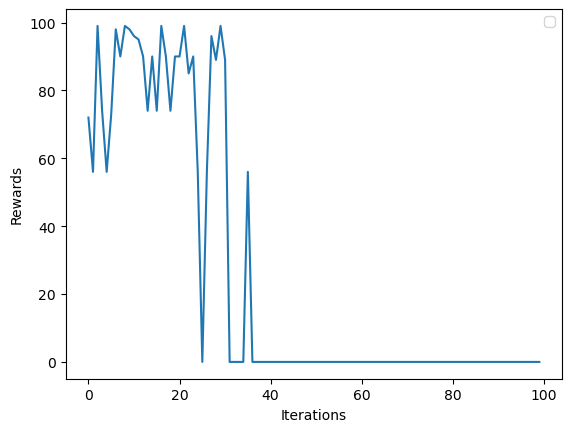

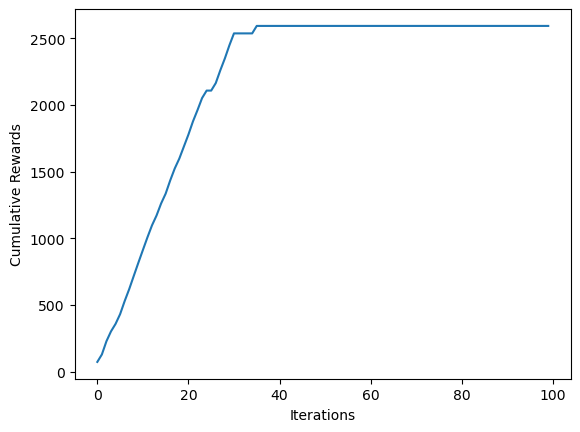

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.legend()
plt.show()

plt.plot(cum_rewards)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Rewards')
plt.show()